<a href="https://colab.research.google.com/github/YuanQi-ME/hello-world/blob/master/Nonlinear_curve_fitting_multiple_to_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
In the previous notebook, we realize the single varible to single varible mapping through simple ANN. In this notebook, we extend it to multiple inputs to single/multiple input(s).

We will walk through two examples here. In the first case, we will try to solve the partial differential equations. 
In the second case, we will try to predict FEM results.
In both cases, we only consider state variables, which means the physical state is history-independent, for example, the elastic beam problem. For those cases that are history-dependent, such as plastic deformation and viscocity, we will probably revisit those problems in the future notebook using RNN.

Case I: 
In this section, we will try to solve PDE
$f_{,xx} + f_{,yy} + 2f = 0$, with boundary condition $f(0,y) = f(x,0) = 0$.
The analytical solution is $f(x,y) = sin(x)sin(y)$

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.2.0


In [2]:
# Build model structure
def build_model(LAYERS_INFO):
  model = keras.Sequential()
  model.add(keras.layers.Dense(LAYERS_INFO[0], activation = 'relu', input_shape=[x_data_items]))
  for num_ in LAYERS_INFO[1:-1]:
    model.add(keras.layers.Dense(num_, activation = 'relu'))

  model.add(keras.layers.Dense(LAYERS_INFO[-1]))

  optimizer = keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse', optimizer = 'adam', metrics=['accuracy'])

  return model

#  
x_data_items = 2
LAYERS_INFO = [10,128,128,1]
model = build_model(LAYERS_INFO)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 18,079
Trainable params: 18,079
Non-trainable params: 0
_________________________________________________________________


In [3]:
# create panda frames
x_test, y_test = np.linspace(-2*np.pi, 2*np.pi, 1000), np.linspace(-2*np.pi, 2*np.pi, 1000)
f_test = np.sin(x_test) * np.sin(y_test)

dataset = np.array([x_test, y_test, f_test])
dataset = pd.DataFrame(dataset)
dataset = dataset.T

train_dataset = dataset.sample(frac=0.8,random_state=0)
train_dataset_label = train_dataset.drop([0,1], axis=1)
train_dataset = train_dataset.drop([2], axis=1)

test_dataset = dataset.drop(train_dataset.index)
test_dataset_label = test_dataset.drop([0,1], axis=1)
test_dataset = test_dataset.drop([2], axis=1)

# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)

# **Train**

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.0000e+00
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 0.0000e+00
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.0000e+00
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 

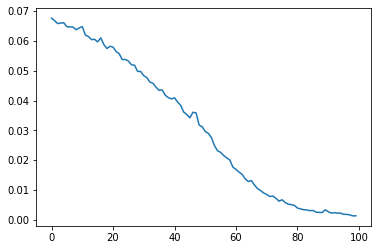

In [5]:
history = model.fit(train_dataset, train_dataset_label, epochs = 100, batch_size = 100)
plt.figure()

loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss)

(200, 1)


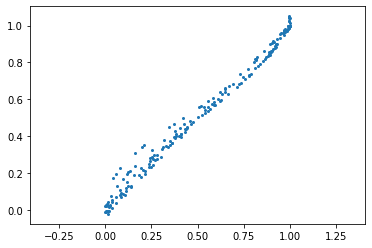

In [6]:
print(model.predict(test_dataset).shape)
# print(model.predict(test_dataset), test_dataset_label.shape)
plt.figure()
plt.scatter(test_dataset_label, model.predict(test_dataset),s=4)
plt.axis('equal')
plt.show()